In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()
print('='*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# relation btw Pclass and Survived
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
# relation btw Sex & Servived
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
# realtion btw SibSp and Survived
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
# realtion btw Parch & Survived
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [28]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

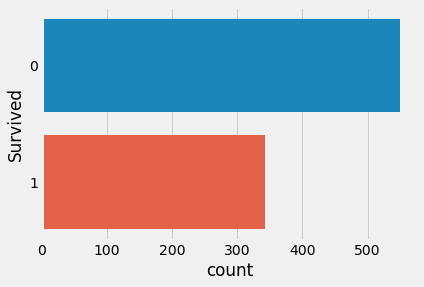

In [133]:
g = sns.countplot(y=train['Survived'])

In [132]:
sns.barplot(x="Sex", y="Survived", data=titanic_df)
plt.show()

NameError: name 'titanic_df' is not defined

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

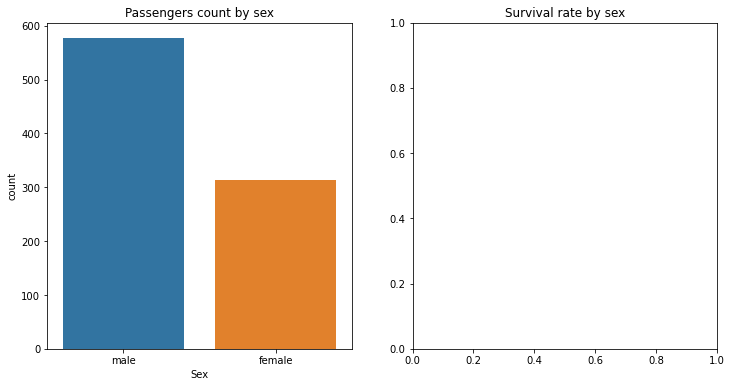

In [35]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(train['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train, ax=axarr[1]).set_ylabel('Survival rate')

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

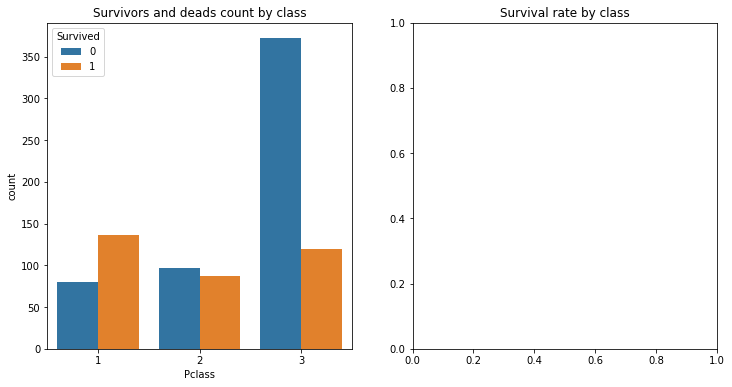

In [36]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=train, ax=axarr[0]).set_title('Survivors and deads count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=train, ax=axarr[1]).set_ylabel('Survival rate')

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

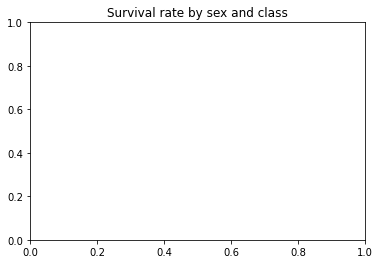

In [37]:
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train).set_ylabel('Survival rate')

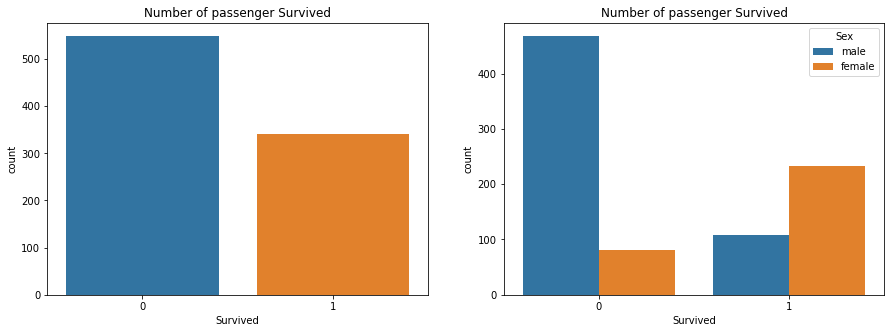

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train.Survived)
plt.title('Number of passenger Survived');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=train)
plt.title('Number of passenger Survived');

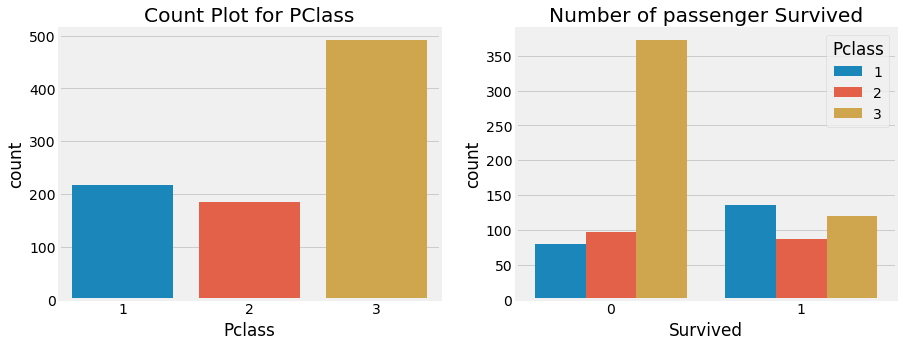

In [40]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['Pclass'])
plt.title('Count Plot for PClass');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=train)
plt.title('Number of passenger Survived');

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

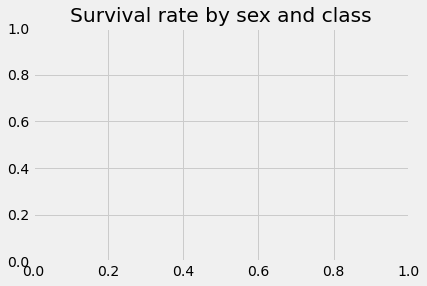

In [46]:
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train).set_ylabel('Survival rate')

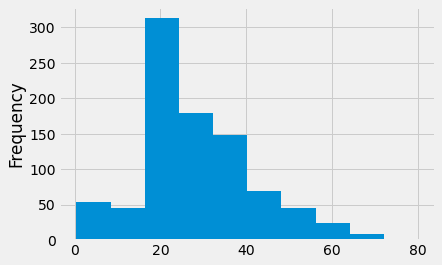

In [117]:
train['Age'].plot(kind='hist')

Text(0.5, 1.0, 'Age Distribution')

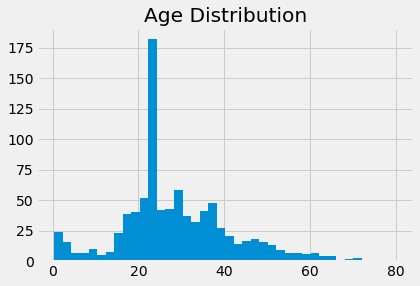

In [119]:
train['Age'].hist(bins=40)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Number of passenger Survived')

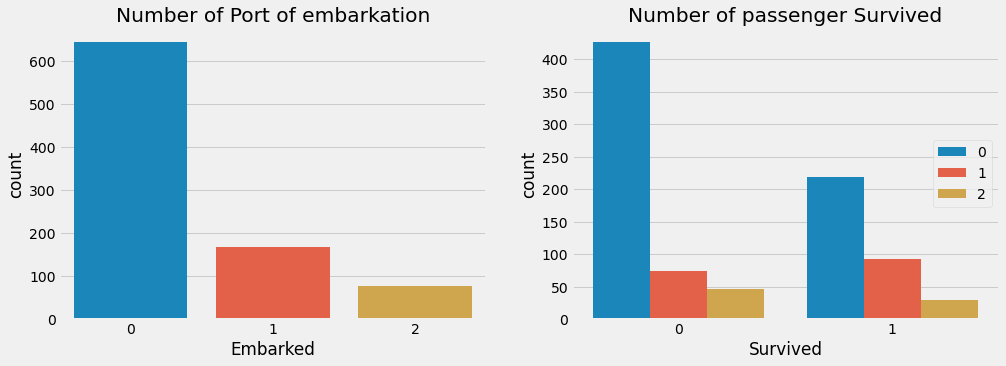

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['Embarked'])
plt.title('Number of Port of embarkation')

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Embarked", data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived')

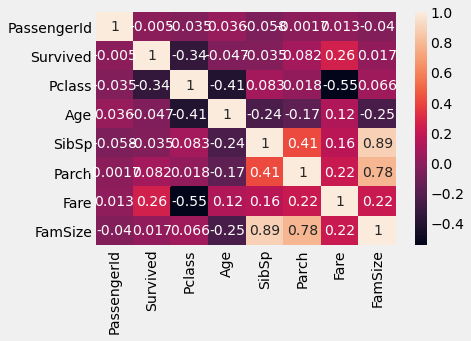

In [130]:
# heatmap to check the corr.
sns.heatmap(train.corr(), annot=True)

In [55]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

train - Age, Cabin, Embarked. 
test - Age, Fare, Cabin.

In [63]:
# Replace missing age values with median age calculated per class

train["Age"].fillna(train["Age"].median(), inplace = True)
#Same for test set
test["Age"].fillna(test["Age"].median(), inplace = True)

In [60]:
# only for train (fill na value with 'S')
train["Embarked"].fillna("S", inplace = True)

In [69]:
# only for test ( update the missing value with median value)
test["Fare"].fillna(test["Fare"].median(), inplace = True)

In [70]:
# replace the missing value with 'unon'
train['Cabin'] = train['Cabin'].fillna('Unon')
test['Cabin'] = test['Cabin'].fillna('Unon')

In [71]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [74]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

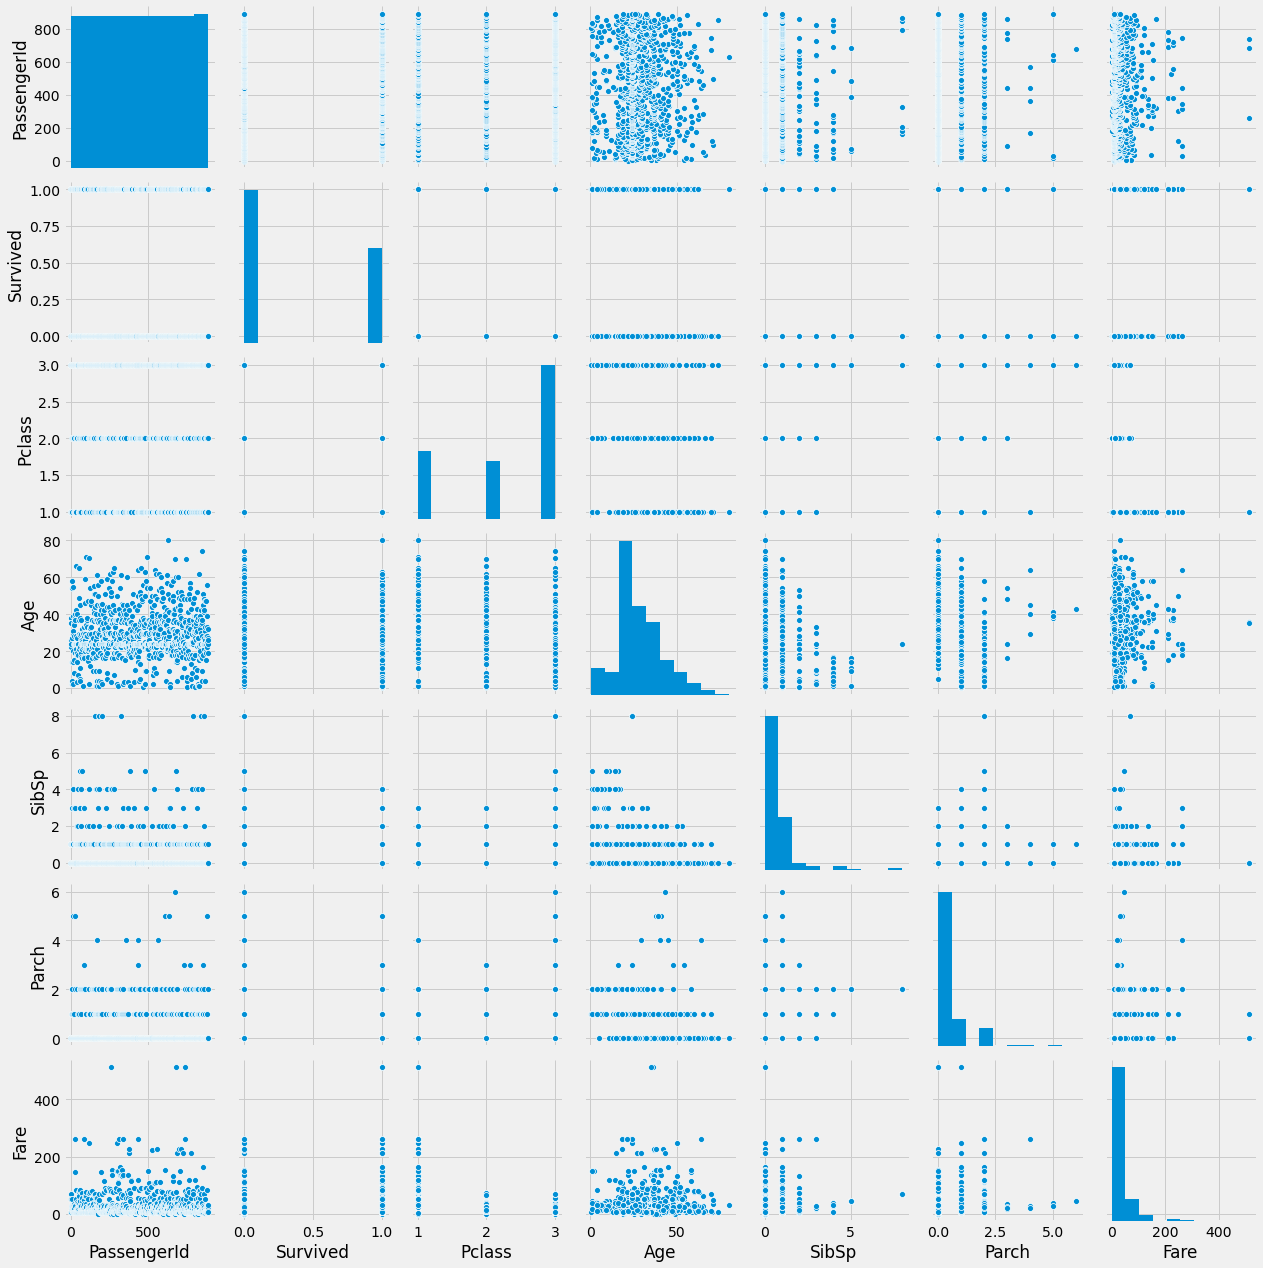

In [76]:
sns.pairplot(train)

In [78]:
# Sex is categorical data so we can replace male to 0 and female to 1
# Same for Embarked

train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

In [80]:
# We can combine SibSp and Parch into one synthetic feature called family size, 
# which indicates the total number of family members on board for each member.

train["FamSize"] = train["SibSp"] + train["Parch"] + 1
test["FamSize"] = test["SibSp"] + test["Parch"] + 1

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score 

In [108]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize"]
x = train[features] #define training features set
y = train["Survived"] #define training label set
X_test = test[features] #define testing features set

In [109]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)

In [110]:
x_train.shape

(668, 6)

In [111]:
x_test.shape

(223, 6)

In [112]:
reg_mod = LogisticRegression()
reg_mod.fit(x_train, y_train)
reg_mod.score(x_train, y_train)

0.8098802395209581

In [113]:
pred = reg_mod.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc)

0.7937219730941704


In [114]:
X_test.head()

,Pclass,Sex,Age,Embarked,Fare,FamSize
0,3,0,34.5,2,7.8292,1
1,3,1,47.0,0,7.0000,2
2,2,0,62.0,2,9.6875,1
3,3,0,27.0,0,8.6625,1
4,3,1,22.0,0,12.2875,3
